# One hot encoding - iris Classification

## iris 데이터

In [6]:
from sklearn.datasets import load_iris

iris = load_iris()

x = iris.data
y = iris.target

len(y)

150

## sklearn의 one-hot encoding

In [18]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit(y.reshape(len(y), 1))

/Users/taeheon/miniforge3/envs/eda_study/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [19]:
enc.categories_

[array([0, 1, 2])]

In [20]:
y_onehot = enc.transform(y.reshape(len(y), 1))

y_onehot[45:50], y_onehot[50:55], y_onehot[100:105]

(array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]]),
 array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]]),
 array([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]]))

## 데이터 분할

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y_onehot,
                                                    test_size=0.2,
                                                    random_state=13)

## 신경망 구성

In [22]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(4,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [15]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,))
])

model.compile(optimizer='rmsprop', loss='mse')

## compile

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                160       
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 32)                1056      
                                                                 
 dense_12 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2371 (9.26 KB)
Trainable params: 2371 (9.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## train

In [24]:
hist = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2240 - accuracy: 0.4917
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0868 - accuracy: 0.6250
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.9959 - accuracy: 0.6500
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.9411 - accuracy: 0.6750
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8902 - accuracy: 0.8000
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8386 - accuracy: 0.8917
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7841 - accuracy: 0.9000
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7333 - accuracy: 0.8417
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6904 - accuracy: 0.7500
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6439 - accuracy: 0.8250
Epoch 11/100
4/4 [===========

In [25]:
model.evaluate(x_test, y_test, verbose=2)

1/1 - 0s - loss: 0.1028 - accuracy: 0.9667 - 135ms/epoch - 135ms/step


[0.10279793292284012, 0.9666666388511658]

## loss, accuracy 시각화

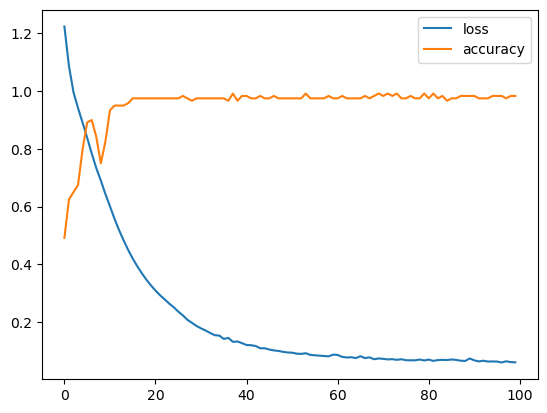

In [32]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.legend(['loss', 'accuracy'])